<a href="https://colab.research.google.com/github/alanmejiaa/Aprendizale-Automatico/blob/main/Tarea%20%235.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tarea en clase (2 puntos)**
* Investigar sobre algún otro algoritmo no supervisado que pueda usarse en tu código. Da un panorama sobre el modelo matemático que emplea y explica por qué conviene aplicarlo a tus datos. Algunos modelos que no se vieron en clase son Affinity Propagation, BIRCH, DBSCAN, Mean Shift, Nearest Neighbors, OPTICS, Spectral Clustering, TSNE, entre otros

* Investigar otras estrategias para determinar número de grupos en estos algoritmos (como los índices de Calinski-Harabasz o de Davies-Bouldin), elegir la más adecuada al método que elegiste
# **Tarea (8 puntos)**
* Aplicar al menos un algoritmo no supervisado a tus datos para encontrar estructuras subyacentes
* Elegir alguna métrica para determinar número de grupos, usarla y discutirla
* Busca alguna revista científica que publique trabajos relacionados con el tuyo
* Crea artículo mediante Latex con base en los lineamientos de la revista elegida y redacta ahí tus resultados, discusiones y bibliografía
* Sube el código de tu tarea, los archivos de Latex y el PDF del artículo en tu repositorio, claramente diferenciados

# **Mean Shift**

El método de Mean Shift es una técnica de clustering no paramétrico utilizado en machine learning para agrupar datos similares juntos. Se basa en la idea de encontrar las regiones de alta densidad de puntos en el espacio de características de los datos.

El proceso comienza con una ventana de búsqueda centrada en un punto de datos. Despues, se calcula el centroide de la ventana de búsqueda, que es el punto medio ponderado de los datos dentro de la ventana.

La ventana de búsqueda se mueve hacia el centroide calculado, y se repite el proceso de cálculo del centroide y el desplazamiento de la ventana hasta que se alcanza un máximo local de densidad.

Cada punto de datos se asigna al máximo local de densidad más cercano, y los puntos que convergen a un mismo máximo local se agrupan juntos.

El resultado final del algoritmo es un conjunto de centroides, cada uno representando un grupo de puntos similares.

El método de Mean Shift es eficaz para encontrar los centros de los grupos en datos con formas irregulares o no lineales, y puede manejar conjuntos de datos grandes y de alta dimensionalidad. Sin embargo, puede ser computacionalmente costoso y sensible a la elección del tamaño de la ventana de búsqueda y la función de kernel utilizada.



##Aprendizaje no supervisado##

In [34]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings

warnings.filterwarnings('ignore')

In [35]:
df = pd.read_csv("skudata.csv")
# Utilizamos las variables que son mas relevantes segun la tarea 4.
df = df[['SKU', 'L13UnitsTotal', '_28', 'AVG_BASE_COST58', 'Busquedas', 'Instock', 'CR']]
df.head

<bound method NDFrame.head of         SKU  L13UnitsTotal  _28  AVG_BASE_COST58  Busquedas    Instock      CR
0    348186        1097507  125               38     991269     0.9790  0.4875
1    466002         891483   22                3     967704     0.9625  0.0506
2    541353         667941  129               58     725171     0.9970  0.3612
3    466005         544646   22                4     889493     0.8800  0.0484
4    441310         477564   67               29     872521     0.9646  0.2278
..      ...            ...  ...              ...        ...        ...     ...
295  417864          63061  179               88     203511  9407.0000  0.4654
296  695777          62929    5                2     645412  9457.0000  0.0130
297  252905          62929  199               77     292465  9075.0000  0.6766
298  835366          62851   51               14     869680  9860.0000  0.1479
299  686199          62810  105               41     571263  9020.0000  0.3675

[300 rows x 7 columns

In [36]:
X = df
y = df['_28']

Feature Scalling

In [37]:
cols = df.columns

In [38]:
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()

df = ms.fit_transform(df)

In [39]:
X = pd.DataFrame(df, columns=[cols])
X.head()

,SKU,L13UnitsTotal,_28,AVG_BASE_COST58,Busquedas,Instock,CR
0,0.294678,1.000000,0.036430,0.029221,0.979413,0.000010,0.041684
1,0.395545,0.800885,0.005161,0.000812,0.950988,0.000008,0.003303
2,0.460056,0.584839,0.037644,0.045455,0.658445,0.000012,0.030589
3,0.395548,0.465678,0.005161,0.001623,0.856650,0.000000,0.003110
4,0.374406,0.400846,0.018822,0.021916,0.836179,0.000008,0.018870


Metodo del Codo para encontrar el mejor numero de clusters

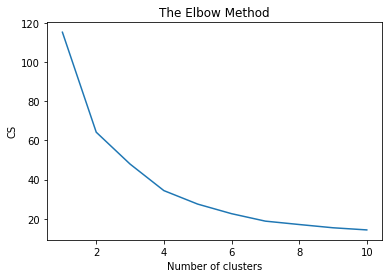

In [40]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

In [41]:
# Analisis
kmeans.cluster_centers_

array([[2.30905719e-01, 3.55586031e-02, 4.08803886e-02, 3.71103896e-02,
        8.35254617e-01, 9.30530205e-01, 3.49065289e-02],
       [5.97436134e-01, 1.59888276e-01, 3.54341226e-02, 4.00649351e-02,
        5.81330680e-01, 5.86443473e-06, 3.07424977e-02],
       [3.09911114e-01, 2.71095829e-02, 4.84430566e-02, 4.87841240e-02,
        1.26468210e-01, 9.45207201e-01, 4.28567484e-02],
       [6.10520707e-01, 2.43050220e-02, 8.14477501e-01, 8.01587302e-01,
        5.82080829e-01, 9.47308192e-01, 6.89485870e-01],
       [7.32876071e-01, 3.38393628e-02, 3.65777716e-02, 3.23010323e-02,
        2.67798979e-01, 9.49311280e-01, 3.24571884e-02],
       [7.54830443e-01, 3.04137669e-02, 4.15300546e-02, 3.95021645e-02,
        7.91555234e-01, 9.35632382e-01, 3.99606438e-02],
       [2.93752327e-01, 1.94872736e-01, 3.69298904e-02, 3.78867456e-02,
        2.21129819e-01, 5.95998282e-06, 3.33634086e-02],
       [3.72648528e-01, 4.05761300e-02, 2.64993591e-01, 3.41360029e-01,
        4.54264252e-01, 9

In [42]:
kmeans.inertia_

14.308545161632997